**Note:** If you encounter any errors about string operations, please restart the kernel and re-run all cells from the beginning.

# Detector Sweep Statistical Analysis

This notebook demonstrates statistical analysis of detector sweep results focusing on:
1. **Detection Rate Analysis** - Detection probability per second across configurations
2. **Sliding Window Analysis** - Time-windowed detection performance (5s, 10s, 15s, 30s)
3. **Trajectory-Level Analysis** - Individual trajectory behavior for specific detector counts

In [1]:
import sys
import os

# Add src to path
sys.path.append(os.path.join(os.getcwd(), 'src'))

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from stats_analysis import SweepAnalyzer, TrajectoryAnalyzer, compare_detector_counts

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

## Part 1: Sweep-Level Analysis

Analyze the aggregated results across all detector counts.

In [2]:
# Load sweep results
sweep_path = 'results/sweep_example/detector_sweep_results.csv'
sweep_analyzer = SweepAnalyzer(sweep_path)

# Show the raw data
print("=== Detector Sweep Data ===")
sweep_analyzer.df

=== Detector Sweep Data ===


,n_detectors,optimization_time_seconds,mean_cumulative_detection_prob,mean_avg_detection_per_second,mean_time_in_observable,mean_time_in_nonobservable,mean_sliding_window_5s_min,mean_sliding_window_5s_max,mean_sliding_window_5s_mean,mean_sliding_window_10s_min,...,mean_sliding_window_15s_mean,mean_sliding_window_20s_min,mean_sliding_window_20s_max,mean_sliding_window_20s_mean,mean_sliding_window_30s_min,mean_sliding_window_30s_max,mean_sliding_window_30s_mean,detector_mean_coverage,detector_min_coverage,detector_fraction_covered
0,5,172.591972,0.722078,0.041548,358.64,281.26,0.000000,0.672482,0.089049,0.000000,...,0.148977,NaN,NaN,NaN,0.000000,0.716665,0.243438,0.035427,0.0,0.030687
1,10,193.253109,0.828789,0.080623,359.54,281.62,0.000000,0.788433,0.171931,0.000000,...,0.274208,NaN,NaN,NaN,0.000000,0.828240,0.398691,0.070854,0.0,0.061374
2,15,258.801898,0.973940,0.122869,356.22,284.52,0.000000,0.942750,0.261474,0.000000,...,0.427862,NaN,NaN,NaN,0.054414,0.971681,0.580548,0.106280,0.0,0.092062
3,20,313.147291,0.999967,0.170511,358.96,282.08,0.000000,0.994690,0.365925,0.000000,...,0.586438,NaN,NaN,NaN,0.069910,0.999769,0.783821,0.141659,0.0,0.122749
4,25,373.241560,1.000000,0.195237,357.38,282.98,0.000000,0.999324,0.404110,0.000000,...,0.618566,NaN,NaN,NaN,0.142195,0.999999,0.802922,0.176755,0.0,0.153436
5,30,429.034431,0.999997,0.258343,354.90,284.54,0.000000,0.996345,0.534068,0.000000,...,0.780629,NaN,NaN,NaN,0.491264,0.999854,0.928446,0.211624,0.0,0.185129
6,35,484.838723,0.999961,0.276542,358.06,281.02,0.000000,0.996428,0.571444,0.011341,...,0.809560,NaN,NaN,NaN,0.568570,0.999804,0.933307,0.246845,0.0,0.215615
7,40,559.516823,0.999842,0.321800,359.28,280.64,0.005974,0.990498,0.645596,0.084923,...,0.890932,NaN,NaN,NaN,0.836557,0.997886,0.977658,0.280527,0.0,0.248617
8,45,694.794771,1.000000,0.379549,360.26,281.14,0.012091,0.999981,0.731083,0.082582,...,0.927603,NaN,NaN,NaN,0.868512,1.000000,0.991479,0.312804,0.0,0.282222
9,50,667.222629,1.000000,0.355450,358.70,281.48,0.003894,0.999054,0.707811,0.075864,...,0.924073,NaN,NaN,NaN,0.826198,0.999993,0.986807,0.345048,0.0,0.318141


In [3]:
# Summary statistics
print("\n=== Summary Statistics ===")
sweep_analyzer.summary_statistics()


=== Summary Statistics ===


,count,mean,std,min,25%,50%,75%,max,median
n_detectors,10.0,27.500000,15.138252,5.000000,16.250000,27.500000,38.750000,50.000000,27.500000
optimization_time_seconds,10.0,414.644321,186.281911,172.591972,272.388246,401.137995,540.847298,694.794771,401.137995
mean_cumulative_detection_prob,10.0,0.952457,0.096971,0.722078,0.980415,0.999964,0.999999,1.000000,0.999964
mean_avg_detection_per_second,10.0,0.220247,0.116714,0.041548,0.134779,0.226790,0.310485,0.379549,0.226790
mean_time_in_observable,10.0,358.194000,1.623742,354.900000,357.550000,358.670000,359.200000,360.260000,358.670000
mean_time_in_nonobservable,10.0,282.128000,1.418801,280.640000,281.170000,281.550000,282.755000,284.540000,281.550000
mean_sliding_window_5s_min,10.0,0.002196,0.004066,0.000000,0.000000,0.000000,0.002921,0.012091,0.000000
mean_sliding_window_5s_max,10.0,0.937998,0.114023,0.672482,0.954687,0.995518,0.998398,0.999981,0.995518
mean_sliding_window_5s_mean,10.0,0.448249,0.225547,0.089049,0.287587,0.469089,0.627058,0.731083,0.469089
mean_sliding_window_10s_min,10.0,0.025471,0.038626,0.000000,0.000000,0.000000,0.059733,0.084923,0.000000


In [4]:
# Detection rate statistics by detector count
print("\n=== Detection Rate Stats by Detector Count ===")
sweep_analyzer.detection_stats_by_detector_count()[['mean_avg_detection_per_second', 'mean_time_in_nonobservable']]


=== Detection Rate Stats by Detector Count ===


,mean_avg_detection_per_second,mean_time_in_nonobservable
n_detectors,,
5,0.041548,281.26
10,0.080623,281.62
15,0.122869,284.52
20,0.170511,282.08
25,0.195237,282.98
30,0.258343,284.54
35,0.276542,281.02
40,0.321800,280.64
45,0.379549,281.14


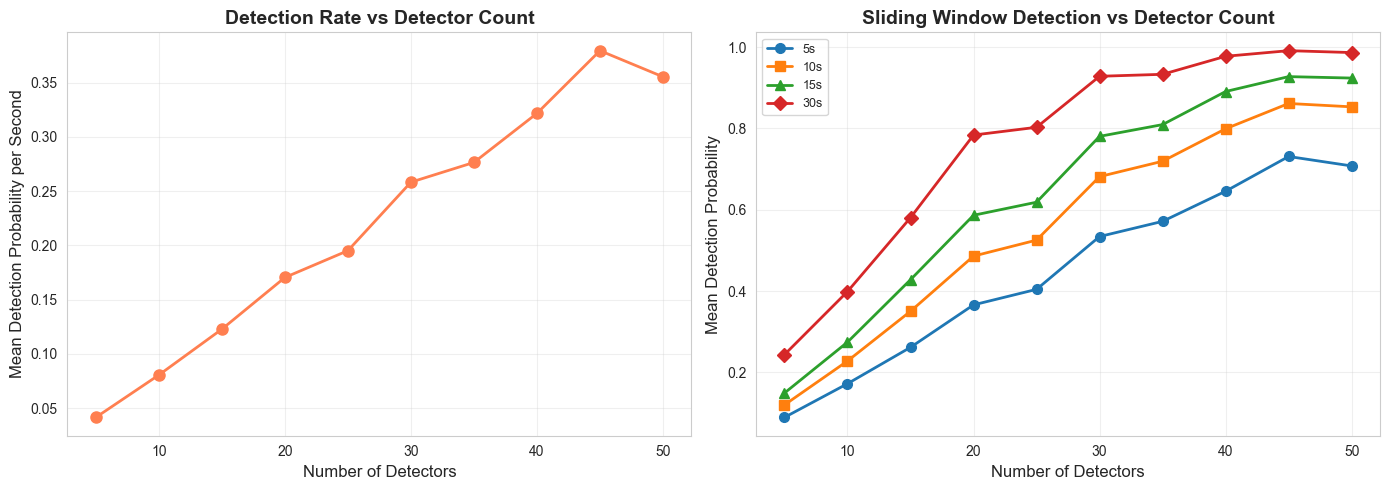

In [5]:
# Plot detection rate and sliding windows vs detector count
sweep_analyzer.plot_detection_vs_detectors(figsize=(14, 5))
plt.show()

### Sliding Window Analysis


=== Mean Detection for All Time Windows ===
                   5s       10s       15s       30s
n_detectors                                        
5            0.089049  0.119764  0.148977  0.243438
10           0.171931  0.227777  0.274208  0.398691
15           0.261474  0.350136  0.427862  0.580548
20           0.365925  0.485934  0.586438  0.783821
25           0.404110  0.525292  0.618566  0.802922
30           0.534068  0.681557  0.780629  0.928446
35           0.571444  0.719383  0.809560  0.933307
40           0.645596  0.799297  0.890932  0.977658
45           0.731083  0.861521  0.927603  0.991479
50           0.707811  0.853251  0.924073  0.986807


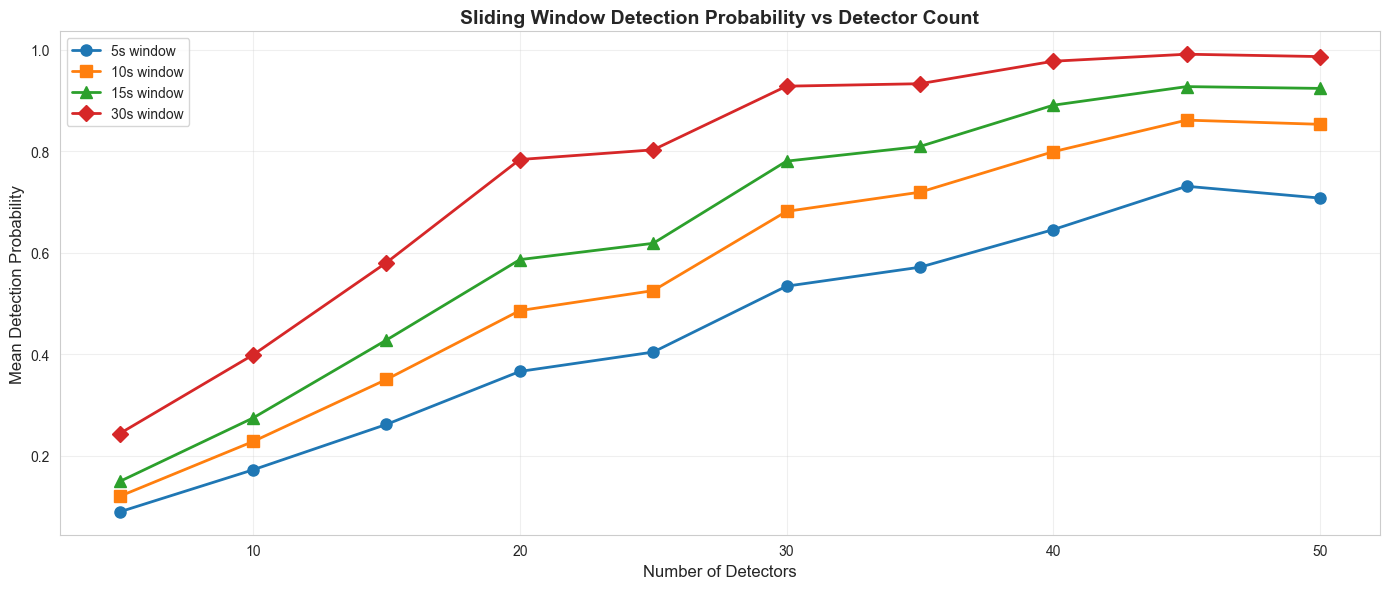

In [6]:
# All sliding window means
print("\n=== Mean Detection for All Time Windows ===")
window_means = sweep_analyzer.all_window_means()
print(window_means)

# Plot all sliding windows
sweep_analyzer.plot_sliding_windows(figsize=(14, 6))
plt.show()

In [7]:
# Detailed stats for specific window sizes
for window in ['5s', '10s', '15s', '30s']:
    print(f"\n=== Sliding Window {window} ===")
    print(sweep_analyzer.sliding_window_stats(window))


=== Sliding Window 5s ===
             mean_sliding_window_5s_min  mean_sliding_window_5s_max  \
n_detectors                                                           
5                              0.000000                    0.672482   
10                             0.000000                    0.788433   
15                             0.000000                    0.942750   
20                             0.000000                    0.994690   
25                             0.000000                    0.999324   
30                             0.000000                    0.996345   
35                             0.000000                    0.996428   
40                             0.005974                    0.990498   
45                             0.012091                    0.999981   
50                             0.003894                    0.999054   

             mean_sliding_window_5s_mean  
n_detectors                               
5                               0.

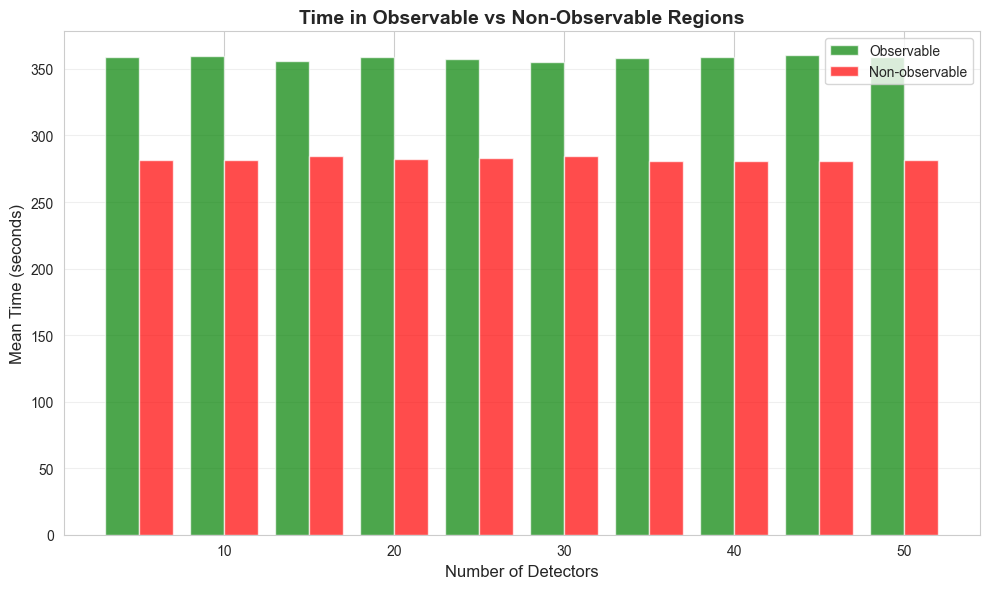

In [8]:
# Time analysis
sweep_analyzer.plot_time_analysis(figsize=(10, 6))
plt.show()

## Part 2: Trajectory-Level Analysis

Analyze individual trajectory results for specific detector counts.

In [9]:
# Analyze trajectories for n=10 detectors
traj_path_15 = 'results/sweep_example/n10_detectors/with_detectors_exclude_observable.csv'
traj_analyzer_15 = TrajectoryAnalyzer(traj_path_15)

print(f"\n=== Trajectory Analysis: {traj_analyzer_15.n_detectors} Detectors ===")
print(f"Number of trajectories: {len(traj_analyzer_15.df)}")

# Show first few trajectories
print("\nFirst 5 trajectories:")
traj_analyzer_15.df.head()


=== Trajectory Analysis: 10 Detectors ===
Number of trajectories: 51

First 5 trajectories:


,trajectory_id,cumulative_detection_prob,avg_detection_per_second,time_in_observable,time_in_nonobservable,sliding_window_5s_min,sliding_window_5s_max,sliding_window_5s_mean,sliding_window_10s_min,sliding_window_10s_max,sliding_window_10s_mean,sliding_window_15s_min,sliding_window_15s_max,sliding_window_15s_mean,sliding_window_20s_min,sliding_window_20s_max,sliding_window_20s_mean,sliding_window_30s_min,sliding_window_30s_max,sliding_window_30s_mean
0,0.0,1.0,0.144691,324.0,332.0,0.0,0.999973,0.309253,0.0,1.0,0.415197,0.0,1.0,0.507274,NaN,NaN,NaN,0.0,1.0,0.741357
1,1.0,1.0,0.143463,318.0,337.0,0.0,1.000000,0.266543,0.0,1.0,0.343549,0.0,1.0,0.418182,NaN,NaN,NaN,0.0,1.0,0.635346
2,2.0,1.0,0.133248,305.0,336.0,0.0,1.000000,0.273545,0.0,1.0,0.369875,0.0,1.0,0.458944,NaN,NaN,NaN,0.0,1.0,0.705151
3,3.0,1.0,0.105586,332.0,335.0,0.0,0.999868,0.251532,0.0,1.0,0.336616,0.0,1.0,0.414325,NaN,NaN,NaN,0.0,1.0,0.664864
4,4.0,1.0,0.127105,313.0,335.0,0.0,1.000000,0.283041,0.0,1.0,0.375112,0.0,1.0,0.461892,NaN,NaN,NaN,0.0,1.0,0.724181


In [10]:
# Summary statistics for trajectories
print("\n=== Trajectory Summary Statistics ===")
traj_analyzer_15.summary_statistics()


=== Trajectory Summary Statistics ===


,count,mean,std,min,25%,50%,75%,max,median
cumulative_detection_prob,51.0,0.828789,0.356407,0.0,0.931967,1.000000,1.000000,1.000000,1.000000
avg_detection_per_second,51.0,0.080623,0.054945,0.0,0.016122,0.093251,0.131019,0.148280,0.093251
time_in_observable,51.0,359.540000,54.055235,305.0,321.500000,340.000000,360.770000,478.000000,340.000000
time_in_nonobservable,51.0,281.620000,59.299879,155.0,292.500000,297.000000,321.000000,337.000000,297.000000
sliding_window_5s_min,51.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
sliding_window_5s_max,51.0,0.788433,0.366621,0.0,0.731077,0.999983,1.000000,1.000000,0.999983
sliding_window_5s_mean,51.0,0.171931,0.107028,0.0,0.065320,0.202632,0.253170,0.312423,0.202632
sliding_window_10s_min,51.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
sliding_window_10s_max,51.0,0.813120,0.357577,0.0,0.846247,1.000000,1.000000,1.000000,1.000000
sliding_window_10s_mean,51.0,0.227777,0.137815,0.0,0.094992,0.278866,0.322791,0.425031,0.278866


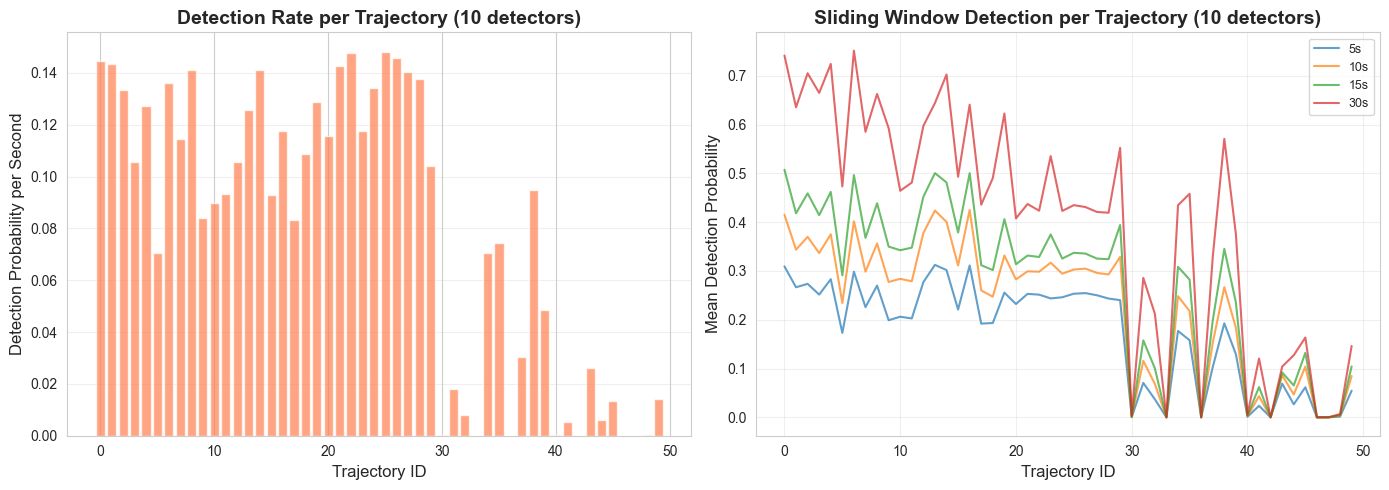

In [11]:
# Plot detection per trajectory
traj_analyzer_15.plot_trajectory_detection(figsize=(14, 5))
plt.show()

In [12]:
# Sliding window statistics across all trajectories
print("\n=== Sliding Window Statistics (across all trajectories) ===")
for window in ['5s', '10s', '15s', '30s']:
    stats = traj_analyzer_15.sliding_window_stats(window)
    print(f"\n{window} window:")
    for key, val in stats.items():
        print(f"  {key}: {val:.4f}")


=== Sliding Window Statistics (across all trajectories) ===

5s window:
  mean_of_means: 0.1719
  std_of_means: 0.1070
  min_across_all: 0.0000
  max_across_all: 1.0000
  mean_of_mins: 0.0000
  mean_of_maxs: 0.7884

10s window:
  mean_of_means: 0.2278
  std_of_means: 0.1378
  min_across_all: 0.0000
  max_across_all: 1.0000
  mean_of_mins: 0.0000
  mean_of_maxs: 0.8131

15s window:
  mean_of_means: 0.2742
  std_of_means: 0.1640
  min_across_all: 0.0000
  max_across_all: 1.0000
  mean_of_mins: 0.0000
  mean_of_maxs: 0.8239

30s window:
  mean_of_means: 0.3987
  std_of_means: 0.2366
  min_across_all: 0.0000
  max_across_all: 1.0000
  mean_of_mins: 0.0000
  mean_of_maxs: 0.8282


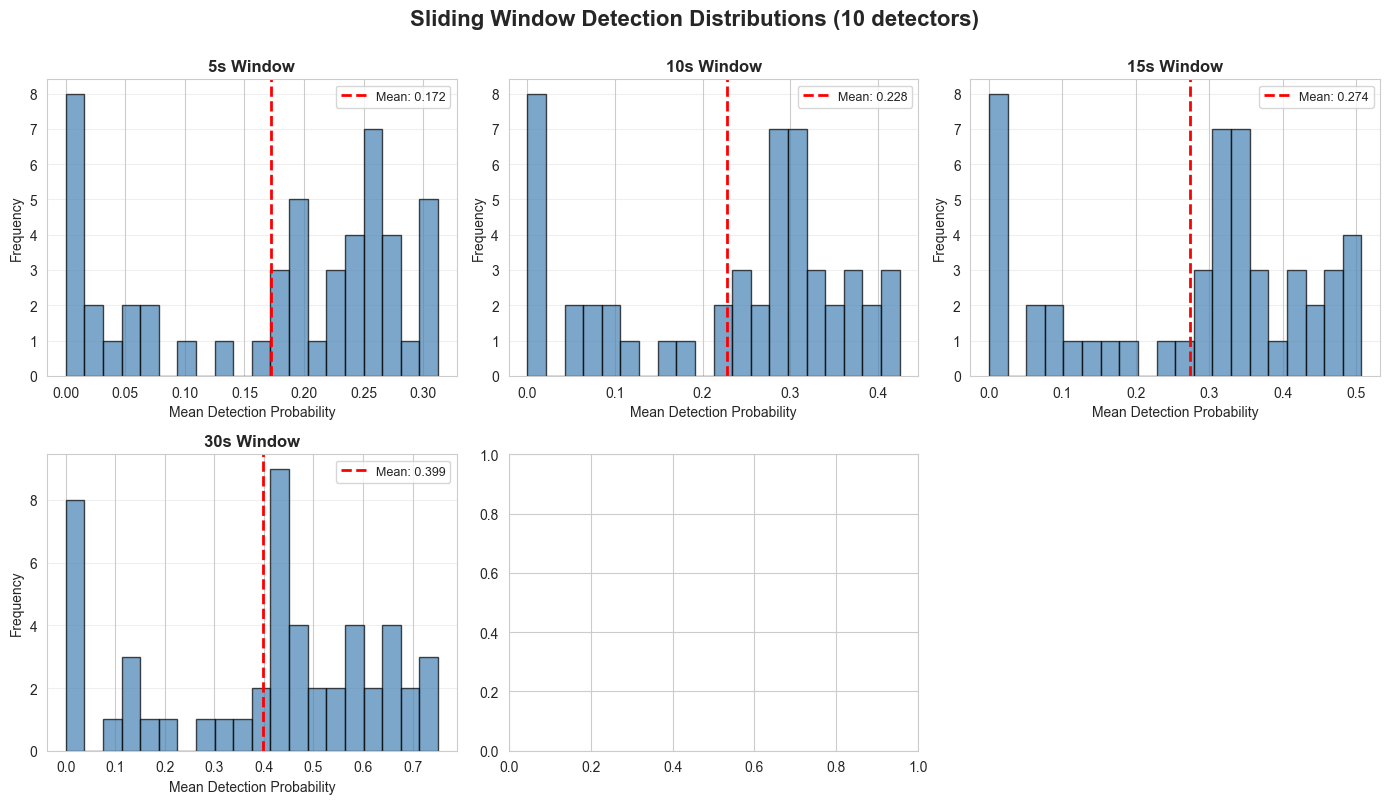

In [13]:
# Plot sliding window distributions
traj_analyzer_15.plot_sliding_windows_distribution(figsize=(14, 8))
plt.show()

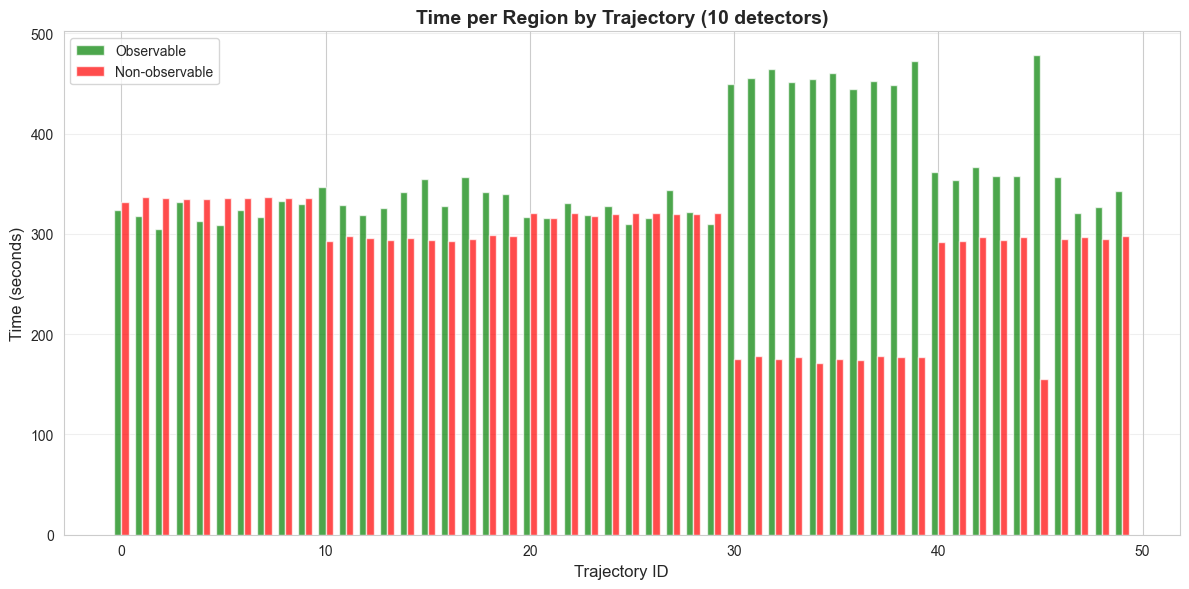

In [14]:
# Time comparison
traj_analyzer_15.plot_time_comparison(figsize=(12, 6))
plt.show()

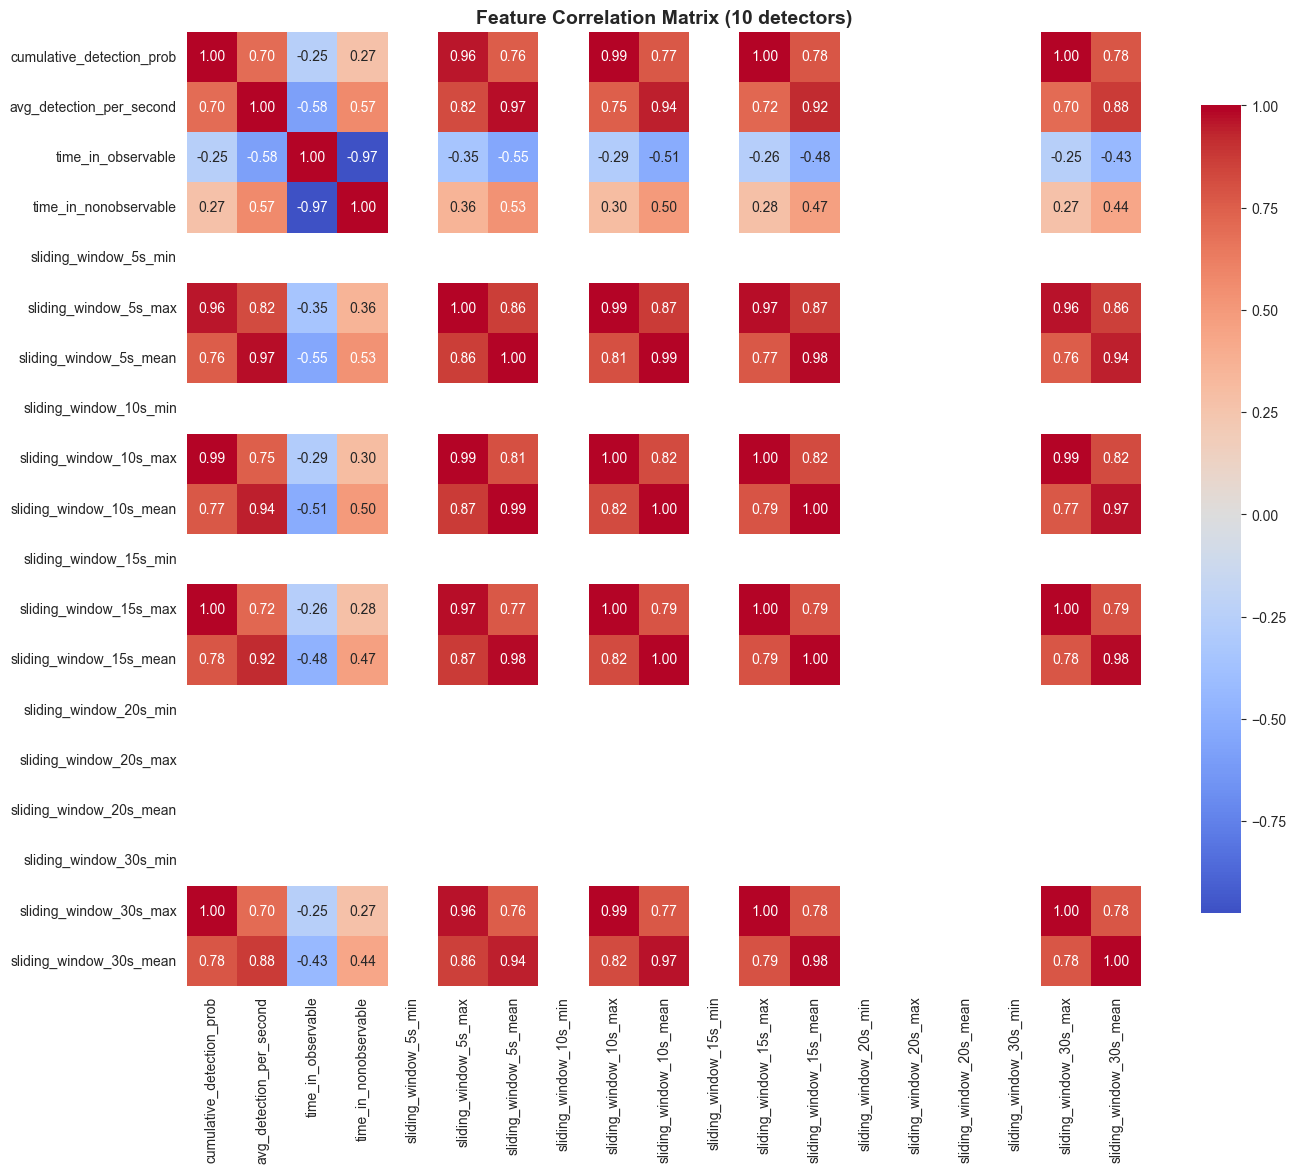

In [15]:
# Correlation matrix
traj_analyzer_15.correlation_matrix(figsize=(14, 12))
plt.show()

## Part 3: Comparing Different Detector Counts

Compare trajectory-level statistics across different detector configurations.

In [16]:
# Load multiple detector counts from current sweep
detector_counts = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
trajectory_paths = [f'results/sweep_example/n{n}_detectors/with_detectors_exclude_observable.csv' 
                   for n in detector_counts]

# Create analyzers for each
analyzers = {n: TrajectoryAnalyzer(path) for n, path in zip(detector_counts, trajectory_paths)}

print("\n=== Comparison Across Detector Counts ===")
for n, analyzer in analyzers.items():
    print(f"\n{n} detectors:")
    print(f"  Mean detection per second: {analyzer.df['avg_detection_per_second'].mean():.4f}")
    print(f"  Std detection per second: {analyzer.df['avg_detection_per_second'].std():.4f}")
    print(f"  Mean 30s window detection: {analyzer.df['sliding_window_30s_mean'].mean():.4f}")
    print(f"  Std 30s window detection: {analyzer.df['sliding_window_30s_mean'].std():.4f}")


=== Comparison Across Detector Counts ===

5 detectors:
  Mean detection per second: 0.0415
  Std detection per second: 0.0424
  Mean 30s window detection: 0.2434
  Std 30s window detection: 0.1900

10 detectors:
  Mean detection per second: 0.0806
  Std detection per second: 0.0549
  Mean 30s window detection: 0.3987
  Std 30s window detection: 0.2366

15 detectors:
  Mean detection per second: 0.1229
  Std detection per second: 0.0810
  Mean 30s window detection: 0.5805
  Std 30s window detection: 0.2819

20 detectors:
  Mean detection per second: 0.1705
  Std detection per second: 0.0536
  Mean 30s window detection: 0.7838
  Std 30s window detection: 0.1186

25 detectors:
  Mean detection per second: 0.1952
  Std detection per second: 0.0682
  Mean 30s window detection: 0.8029
  Std 30s window detection: 0.1738

30 detectors:
  Mean detection per second: 0.2583
  Std detection per second: 0.0802
  Mean 30s window detection: 0.9284
  Std 30s window detection: 0.0985

35 detectors:
 

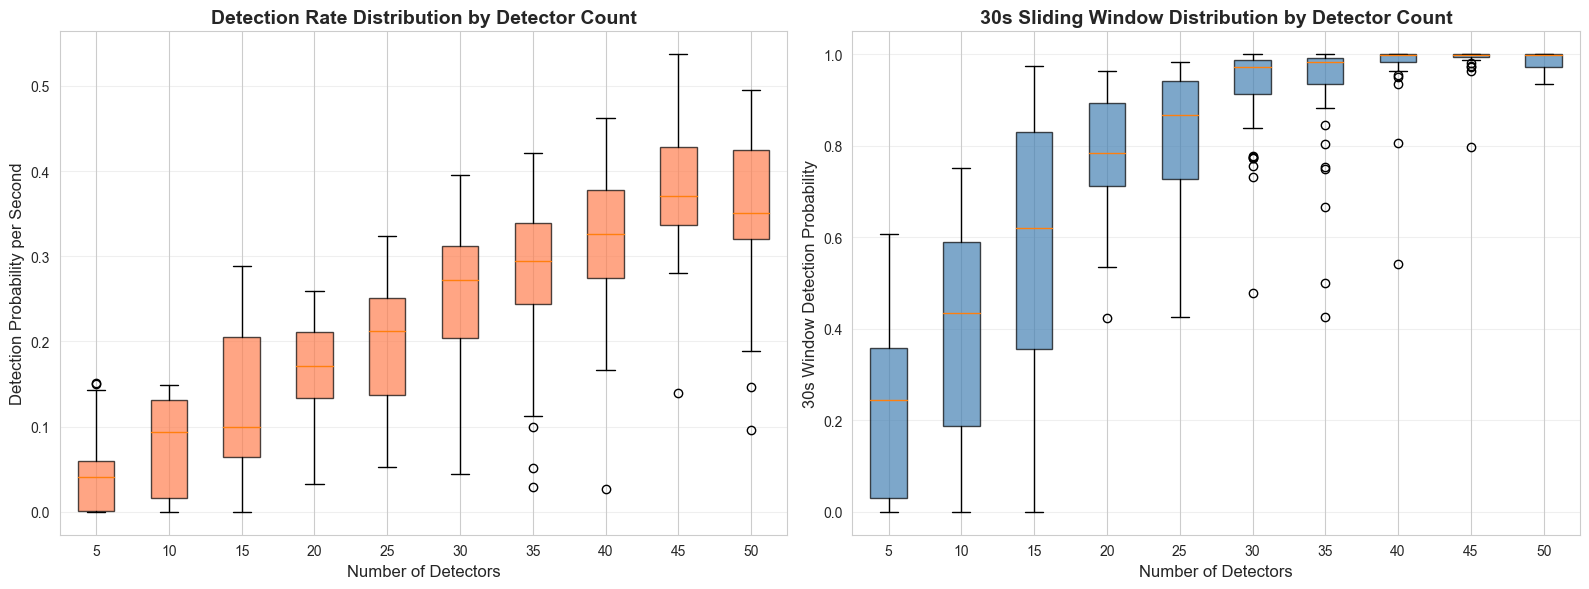

In [17]:
# Box plot comparison
compare_detector_counts(trajectory_paths, figsize=(16, 6))
plt.show()

### Sliding Window Comparison Across Detector Counts

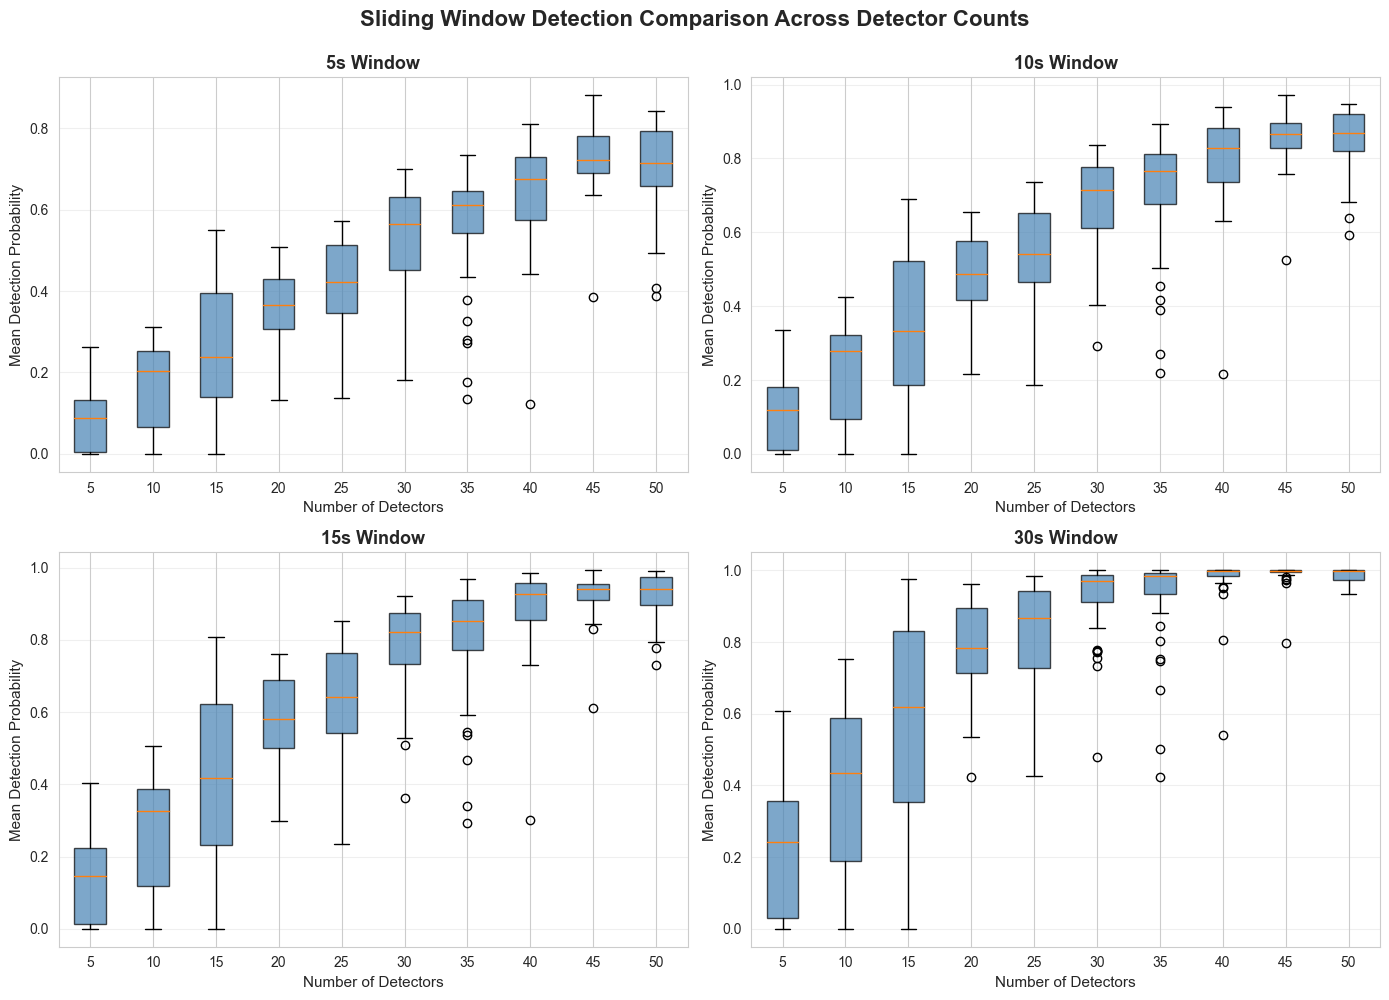

In [18]:
# Compare sliding window performance across detector counts
window_sizes = ['5s', '10s', '15s', '30s']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, window in enumerate(window_sizes):
    ax = axes[i]
    
    # Collect data for this window across all detector counts
    data = []
    labels = []
    for n in detector_counts:
        col = f'sliding_window_{window}_mean'
        data.append(analyzers[n].df[col])
        labels.append(str(n))
    
    bp = ax.boxplot(data, labels=labels, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('steelblue')
        patch.set_alpha(0.7)
    
    ax.set_xlabel('Number of Detectors', fontsize=11)
    ax.set_ylabel('Mean Detection Probability', fontsize=11)
    ax.set_title(f'{window} Window', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('Sliding Window Detection Comparison Across Detector Counts', 
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Part 4: Custom Analysis

Perform custom queries and analysis.

In [19]:
# Example: Find trajectories with lowest detection rate
print(f"\n=== Trajectories with Lowest Detection Rate ({traj_analyzer_15.n_detectors} detectors) ===")
worst_5 = traj_analyzer_15.df.nsmallest(5, 'avg_detection_per_second')
print(worst_5[['trajectory_id', 'avg_detection_per_second', 'sliding_window_30s_mean', 'time_in_nonobservable']])


=== Trajectories with Lowest Detection Rate (10 detectors) ===
    trajectory_id  avg_detection_per_second  sliding_window_30s_mean  \
33           33.0                       0.0                      0.0   
36           36.0                       0.0                      0.0   
42           42.0                       0.0                      0.0   
46           46.0                       0.0                      0.0   
47           47.0                       0.0                      0.0   

    time_in_nonobservable  
33                  177.0  
36                  174.0  
42                  297.0  
46                  295.0  
47                  297.0  


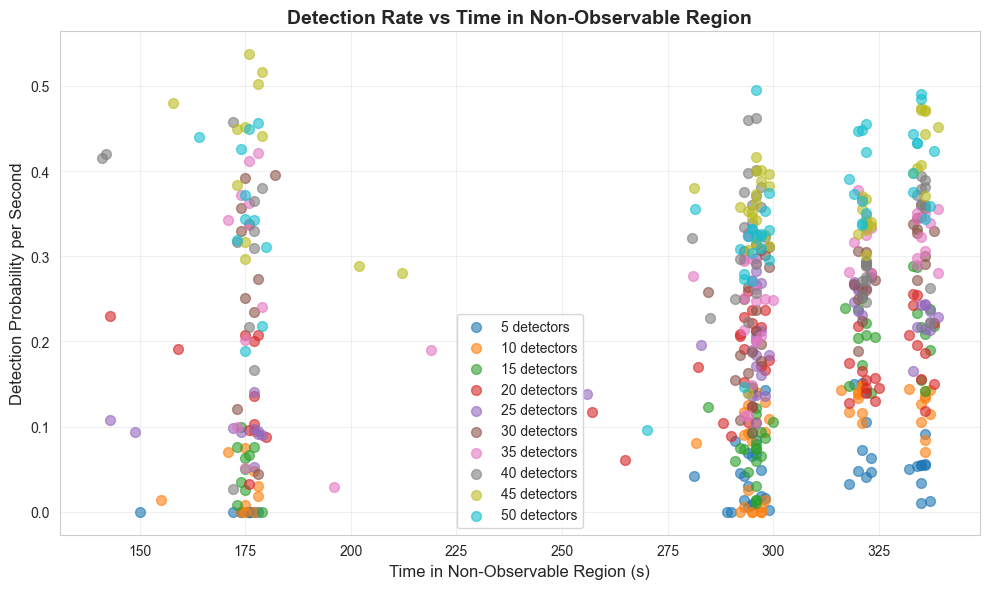

In [20]:
# Example: Analyze relationship between time in non-observable and detection rate
fig, ax = plt.subplots(figsize=(10, 6))

for n in detector_counts:
    analyzer = analyzers[n]
    ax.scatter(analyzer.df['time_in_nonobservable'], 
              analyzer.df['avg_detection_per_second'],
              label=f'{n} detectors', alpha=0.6, s=50)

ax.set_xlabel('Time in Non-Observable Region (s)', fontsize=12)
ax.set_ylabel('Detection Probability per Second', fontsize=12)
ax.set_title('Detection Rate vs Time in Non-Observable Region', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


=== Mean Sliding Window Detection by Detector Count ===
 n_detectors       5s      10s      15s      30s
           5 0.089049 0.119764 0.148977 0.243438
          10 0.171931 0.227777 0.274208 0.398691
          15 0.261474 0.350136 0.427862 0.580548
          20 0.365925 0.485934 0.586438 0.783821
          25 0.404110 0.525292 0.618566 0.802922
          30 0.534068 0.681557 0.780629 0.928446
          35 0.571444 0.719383 0.809560 0.933307
          40 0.645596 0.799297 0.890932 0.977658
          45 0.731083 0.861521 0.927603 0.991479
          50 0.707811 0.853251 0.924073 0.986807


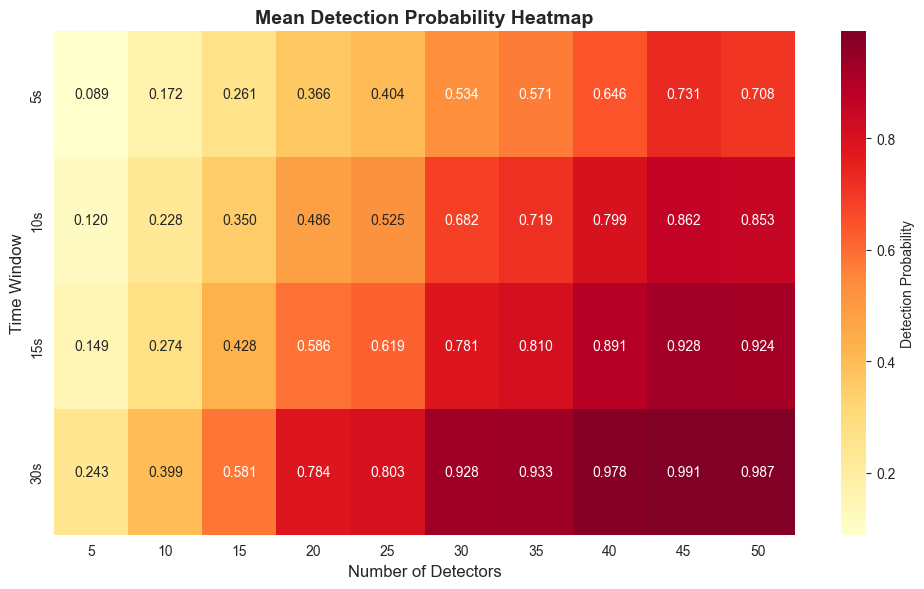

In [21]:
# Example: Mean detection probability for each time window (all detector counts)
window_comparison = pd.DataFrame({
    'n_detectors': detector_counts,
    '5s': [analyzers[n].df['sliding_window_5s_mean'].mean() for n in detector_counts],
    '10s': [analyzers[n].df['sliding_window_10s_mean'].mean() for n in detector_counts],
    '15s': [analyzers[n].df['sliding_window_15s_mean'].mean() for n in detector_counts],
    '30s': [analyzers[n].df['sliding_window_30s_mean'].mean() for n in detector_counts]
})

print("\n=== Mean Sliding Window Detection by Detector Count ===")
print(window_comparison.to_string(index=False))

# Plot as heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(window_comparison.set_index('n_detectors').T, 
           annot=True, fmt='.3f', cmap='YlOrRd', 
           cbar_kws={'label': 'Detection Probability'}, ax=ax)
ax.set_xlabel('Number of Detectors', fontsize=12)
ax.set_ylabel('Time Window', fontsize=12)
ax.set_title('Mean Detection Probability Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()